### 組員名單:
* 107304027  統計二  温睿玲
* 106306079  資管三  陳潔茹
* 106306014  資管三  王瑜
* 105208089  經濟四  呂宇軒


### 問題:
讓使用者得知眼前水果包含之營養素。使用者只須拍照輸入，即可輸出水果包含的營養素。


### 動機:
在生活步調忙碌的現代，多數家庭沒時間煮飯而選擇外食。根據國家衛生研究院調查顯示，早餐、午餐的外食人口皆突破千萬。如何從外食中選擇安心又方便的營養餐點是重要生活議題。如何篩選有利自身健康之外時成為國人的一大難題，忙碌的現代人若能有夠快速計算每餐攝取之營養素，將兼顧效率與健康。
我們由水果切入此議題，希望透過照片辨認出水果種類，依此結果呈現該項水果的詳細營養資訊，讓使用者知道自己是否吃到足量的營養，以利人們選擇，補充自身所需之營養素。

## CNN Model with fruits-360 Data 

We use cnn neural network to train model with fruits-360 data.

[reference](https://www.tensorflow.org/tutorials/images/classification)

[keras-losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

[tf-read_file](https://www.tensorflow.org/api_docs/python/tf/io/read_file)


In [124]:
# import package（需求套件）
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [125]:
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

### 資料庫:
* Fruits 360-Kaggle
* https://www.kaggle.com/moltean/fruits

### 資料介紹:
* Fruits 360為Kaggle上一組90483張水果照片之資料集，包含訓練資料集67692張(一種水果)、驗證資料集22688張(一種水果)和多種水果之資料集103張。
* 每種水果在白色背景上，依照每分鐘三轉之角速度轉動拍攝20秒，得到單一水果之組圖。而每張圖片大小為100*10pixels。
* 總共涵蓋131種水果。

In [126]:
# Image dataset file name 
dataSet ='fruits-360'

# Use os.listdir to check image folder
os.listdir('./fruits-360/Training/')

['Tomato 4',
 'Apple Red Delicious',
 'Tomato 3',
 'Huckleberry',
 'Melon Piel de Sapo',
 'Pear',
 'Cherry 1',
 'Strawberry',
 'Avocado',
 'Tomato 2',
 'Pomegranate',
 'Dates',
 'Carambula',
 '.DS_Store',
 'Granadilla',
 'Tamarillo',
 'Kiwi',
 'Cherry Wax Yellow',
 'Lemon',
 'Guava',
 'Apple Golden 2',
 'Apple Red 1',
 'Mandarine',
 'Quince',
 'Strawberry Wedge',
 'Pear Monster',
 'Raspberry',
 'Pitahaya Red',
 'Apple Golden 3',
 'Grape Pink',
 'Banana Red',
 'Physalis',
 'Cherry Rainier',
 'Maracuja',
 'Plum',
 'Nectarine',
 'Cherry Wax Black',
 'Cantaloupe 2',
 'Lychee',
 'Clementine',
 'Cherry 2',
 'Pineapple Mini',
 'Rambutan',
 'Grape White',
 'Apple Braeburn',
 'Tomato Maroon',
 'Mango',
 'Cocos',
 'Mulberry',
 'Avocado ripe',
 'Tomato 1',
 'Passion Fruit',
 'Apple Granny Smith',
 'Kumquats',
 'Grape White 2',
 'Apricot',
 'Limes',
 'Apple Red Yellow',
 'Pear Williams',
 'Salak',
 'Grapefruit Pink',
 'Apple Golden 1',
 'Banana',
 'Apple Red 2',
 'Physalis with Husk',
 'Lemon Meye

In [127]:
# model training parameter
batch_size = 32
epochs = 10
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [128]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [129]:
# Takes the path to a directory(training) & generates batches of augmented data.
train_dir = './fruits-360/Training/'
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical') #categorical=類別

Found 41322 images belonging to 81 classes.


In [130]:
# Takes the path to a directory(testing) & generates batches of augmented data.
validation_dir = './fruits-360/Test/'
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 13877 images belonging to 81 classes.


In [131]:
# traing & testing image data counts
total_train = 41322
total_validation = 13877

In [132]:
# folder name & class indeices
train_data_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow': 9,
 'Apricot': 10,
 'Avocado': 11,
 'Avocado ripe': 12,
 'Banana': 13,
 'Banana Red': 14,
 'Cactus fruit': 15,
 'Cantaloupe 1': 16,
 'Cantaloupe 2': 17,
 'Carambula': 18,
 'Cherry 1': 19,
 'Cherry 2': 20,
 'Cherry Rainier': 21,
 'Cherry Wax Black': 22,
 'Cherry Wax Red': 23,
 'Cherry Wax Yellow': 24,
 'Clementine': 25,
 'Cocos': 26,
 'Dates': 27,
 'Granadilla': 28,
 'Grape Pink': 29,
 'Grape White': 30,
 'Grape White 2': 31,
 'Grapefruit Pink': 32,
 'Grapefruit White': 33,
 'Guava': 34,
 'Huckleberry': 35,
 'Kaki': 36,
 'Kiwi': 37,
 'Kumquats': 38,
 'Lemon': 39,
 'Lemon Meyer': 40,
 'Limes': 41,
 'Lychee': 42,
 'Mandarine': 43,
 'Mango': 44,
 'Maracuja': 45,
 'Melon Piel de Sapo': 46,
 'Mulberry': 47,
 'Nectarine': 48,
 'Orange': 49,
 'Papaya': 50,
 'Passion Fruit': 51,


In [133]:
# sample data with train_data_gen
sample_training_images, _ = next(train_data_gen) 

In [134]:
# sample data shape (one batch size)
sample_training_images.shape #RGB=3

(32, 64, 64, 3)

In [135]:
# one sample data with train_data_gen
img_tmp = sample_training_images[:1]
img_tmp

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

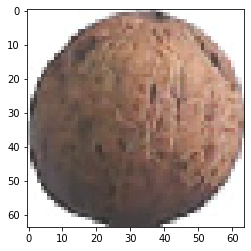

In [136]:
# show image 
plt.imshow(img_tmp.reshape([64,64,3]))

In [137]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

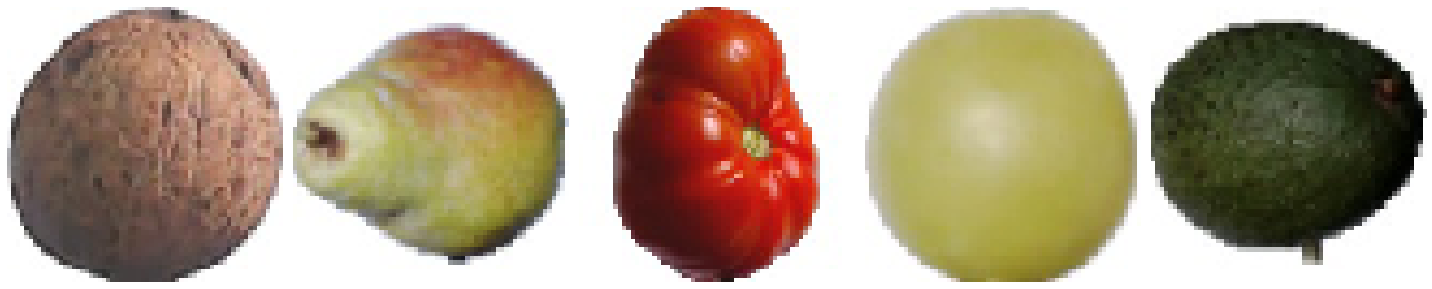

In [138]:
plotImages(sample_training_images[:5])

In [139]:
# model structure
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(81, activation='softmax')
], name='fruit_cnn')

In [140]:
# model learning processing
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # CategoricalCrossentropy
              metrics=['accuracy'])

In [141]:
model.summary()

Model: "fruit_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_3 (Dense)              (None, 81)                41

In [142]:
# model.fit  
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_validation // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1291 steps, validate for 433 steps
Epoch 1/10
1291/1291 [==============================] - 125s 96ms/step - loss: 0.6942 - accuracy: 0.9908 - val_loss: 0.6924 - val_accuracy: 0.9938
Epoch 2/10
1291/1291 [==============================] - 125s 97ms/step - loss: 0.6911 - accuracy: 0.9960 - val_loss: 0.6907 - val_accuracy: 0.9966
Epoch 3/10
1291/1291 [==============================] - 124s 96ms/step - loss: 0.6898 - accuracy: 0.9978 - val_loss: 0.6899 - val_accuracy: 0.9978
Epoch 4/10
1291/1291 [==============================] - 127s 98ms/step - loss: 0.6894 - accuracy: 0.9987 - val_loss: 0.6895 - val_accuracy: 0.9984
Epoch 5/10
1291/1291 [==============================] - 131s 101ms/step - loss: 0.6893 - accuracy: 0.9990 - val_loss: 0.6895 - val_accuracy: 0.9986
Epoch 6/10
1291/1291 [==============================] - 136s 105ms/step - loss: 0.6894 - accuracy: 0.9985 - val_loss: 0.6896 - val_accuracy: 0.9979
Epoch 7/10
1291/1291 

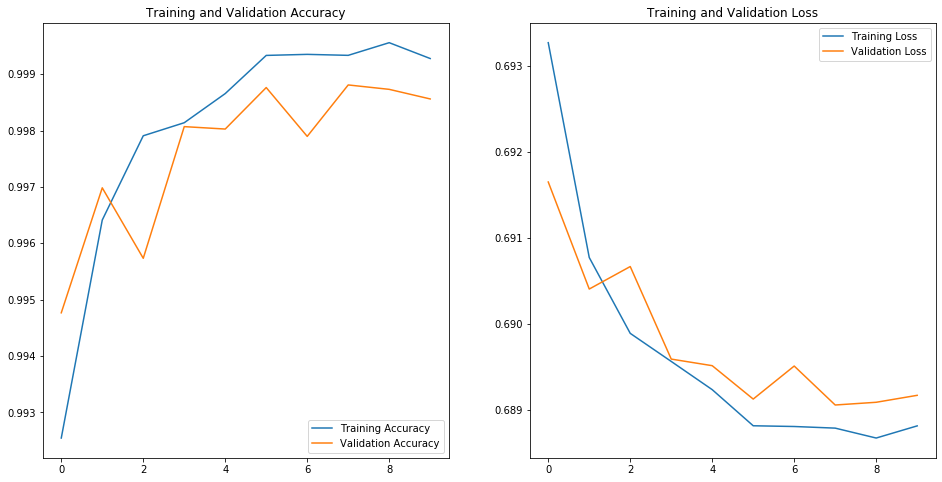

In [20]:
# Training and Validation Accuracy & Training and Validation Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Save Code

* this function will save cnn model to folder named model

In [21]:
# save model with tensorflow 2.0
model.save('./model/my_model_0529.h5') 

## Input image and show something blablabla...


In [24]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [36]:
file_path= './example/banana.jpg' 

# read file with tf.io.read_file
img = tf.io.read_file(file_path)
img

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\

In [24]:
img = decode_img(img)
img

<tf.Tensor: shape=(64, 64, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [25]:
tf.reshape(img, [1,64,64,3])

<tf.Tensor: shape=(1, 64, 64, 3), dtype=float32, numpy=
array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype

In [26]:
model.predict_classes(tf.reshape(img, [1,64,64,3]))[0]

13

In [27]:
image_class = model.predict_classes(tf.reshape(img, [1,64,64,3]))[0]

In [33]:
class_name = list(val_data_gen.class_indices)
# class_name
#predict_name = class_name[image_class]

In [29]:
class_name[13]

'Banana'

In [30]:
image_class, predict_name

(13, 'Banana')

cnn model predict the image is Banana


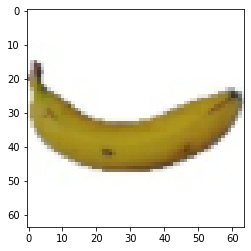

In [31]:
# final print
print(f'cnn model predict the image is {predict_name}')
plt.imshow(img)

In [32]:
!pip install googletrans

You should consider upgrading via the '/Users/wenruiling/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [115]:
# 下載套件以進行影像處理 
pip install pillow

SyntaxError: invalid syntax (<ipython-input-115-312a309022fa>, line 2)

In [ ]:
# 下載套件以進行分詞
pip jieba

In [116]:
# 爬蟲
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#斷詞所需套件
import jieba
# 爬蟲所需套件
import requests
from bs4 import BeautifulSoup
from googletrans import Translator
#GUI介面-tkinter所需套件
from tkinter import *
import tkinter as tk
#匯入Python Imaging Library 
from PIL import ImageTk, Image 
#檔案對話方塊所需套件
from tkinter import filedialog


In [117]:
def open_img(): 
    # 圖片檔案位置x
    global x 
    x = openfilename() 
    # 開啟圖片 
    img = Image.open(x) 
    # ANTIALIAS:平滑濾波，用於改變圖片尺寸  resize the image and apply a high-quality down sampling filter 
    img = img.resize((200, 200), Image.ANTIALIAS) 
    # PhotoImage:建立圖片物件，使用label顯示圖片 
    img = ImageTk.PhotoImage(img) 
    # 創建label 
    panel = Label(window, image = img,bg='white') 
    # set the image as img 
    panel.image = img 
    panel.pack(side='left',ipadx=10, padx=1)
    
def identify():
    file_path = x
    # read file with tf.io.read_file
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    # identify and get the class of fruit image
    image_class = model.predict_classes(tf.reshape(img, [1,64,64,3]))[0]
  #  global predict_name
    predict_name = class_name[image_class]   
    #進行斷詞
    list=jieba.lcut(predict_name)
    #將大寫變小寫 
    global target
    target = list[0].lower()
    # print the result of identification
    identify_label = tk.Label(window,text=predict_name,width=10,height=10,justify='left',bg='white')
    identify_label.pack(side='right',ipadx=10,padx=1)

    
import tkinter.ttk as ttk
import csv
# 讀入中文營養資訊 & 整理 & 輸出csv檔
def OutputCSV():   
    df = pd.read_html('https://docs.google.com/spreadsheets/d/e/2PACX-1vRACnRPosGeh5QPwLuU53UTOjbQf7uSZHnjDp2ecab8_AFE6yjaIxForntAtBahScFSCYlGh9mVhI-x/pubhtml',encoding='utf-8')
    t1 = df[0]
    # 調整表頭名稱
    t1.columns=['#','分析項分類','分析項','單位','每100克含量','名稱']
    t2 = t1.drop("#",axis = 1) #刪除1st行
    t3 = t2.drop([0],axis = 0) #刪除1st列
    # 篩選符合predict_name的蔬果名稱，產出新的df
    newdf = t3[t3.名稱.str.contains(target)]
    # 將df轉成csv檔
    Result = r'\Users\wenruiling\Downloads\nutri_result.csv'
    newdf.to_csv( Result )
    

OutputCSV()
    

In [118]:
def openfilename(): 
    # 開啟檔案對話方塊，並將檔案位置回傳
    filename = filedialog.askopenfilename(title ='Open') 
    return filename 

def printSomething():
    #爬取目標網址
    target_name = target.lower()
    url ='https://fruitsandveggies.org/fruits-and-veggies/'+target_name+'/'
    resp = requests.get(url)
    #若找不到相對網址則顯示'Could not find the relevant information'
    if (resp.status_code == 404):
        text = 'Sorry,we could not find the relevant information.'
    #若找到相對網址則進行爬蟲
    else:
        soup = BeautifulSoup(resp.text,'lxml')
        page = soup.find_all('div',class_='l-grid-item-medium-12')
        
        title = page[0].find_all('h4')
        content = page[0].find_all('p')
        for i in range(len(title)):
            if(i==2):
                text = '●'+title[i].get_text()+'\n'+content[2].get_text()+'\n'
            elif(i==3):
                text = '●'+title[i].get_text()+'\n'+content[2].get_text()+'\n'
                for i in range(len(content)):
                    if(i>2 and i<6):
                        if(i%2 == 1):
                            text = text + '●' + content[i].get_text() +'\n' 
                        else:                    
                            text = text + content[i].get_text() +'\n' 
                    elif(i>6):
                        if(i%2 == 0):
                            text = text + '●' + content[i].get_text() +'\n' 
                        else:
                            text = text + content[i].get_text() +'\n'

    # 將所得到之內容以google翻譯翻譯成中文
    pipi = Translator()
    result = pipi.translate(text,dest='zh-tw')
    result_label = tk.Label(window,text=result.text,width=50,height=50,wraplength=260,justify='left',bg='white')
    result_label.pack(side='right',ipadx=10,padx=1)
    

In [119]:
# 營養資訊表格視窗
def printNutriTable():
    root = Tk()
    root.title("Nutrition Table")
    width = 700
    height = 400
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    x = (screen_width / 2) - (width / 2)
    y = (screen_height / 2) - (height / 2)
    root.geometry("%dx%d+%d+%d" % (width, height, x, y))
    root.resizable(0, 0)

    TableMargin = Frame(root, width=500)
    TableMargin.pack(side=TOP)

    scrollbarx = Scrollbar(TableMargin, orient=HORIZONTAL)
    scrollbary = Scrollbar(TableMargin, orient=VERTICAL)
    #設定表格尺寸與欄位名稱
    tree = ttk.Treeview(TableMargin, columns=('分析項分類','分析項','單位','每100克含量','名稱'), height=400, selectmode="extended",
                        yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
    scrollbary.config(command=tree.yview)
    scrollbary.pack(side=RIGHT, fill=Y)
    scrollbarx.config(command=tree.xview)
    scrollbarx.pack(side=BOTTOM, fill=X)
    tree.heading('分析項分類', text='分析項分類', anchor=W)
    tree.heading('分析項', text='分析項', anchor=W)
    tree.heading('單位', text='單位', anchor=W)
    tree.heading('每100克含量', text='每100克含量', anchor=W)
    tree.heading('名稱', text='名稱', anchor=W)
    tree.column('#0', stretch=NO, minwidth=0, width=0)
    tree.column('#1', stretch=NO, minwidth=0, width=90) #調整表頭欄位尺寸
    tree.column('#2', stretch=NO, minwidth=0, width=130)
    tree.column('#3', stretch=NO, minwidth=0, width=50)
    tree.column('#4', stretch=NO, minwidth=0, width=100)
    tree.column('#5', stretch=NO, minwidth=0, width=160)
    tree.pack()
    
   #http://passionfruittaiwan.blogspot.com/2019/01/python.html
    # 開啟中文營養資訊csv檔
    with open(r'\Users\wenruiling\Downloads\nutri_result.csv', 'r',encoding='utf-8') as f:
        # 讀取中文營養資訊csv檔
      reader = csv.DictReader(f, delimiter=',')
    #reader = pd.read_csv(r'\Users\wenruiling\Downloads\nutri_result.csv', 'r',encoding='utf-8')
    # 以迴圈輸出指定欄位
      for row in reader:          
        tag = row['分析項分類']
        nutri = row['分析項']
        unit = row['單位']
        has = row['每100克含量']
        name = row['名稱']
        # predict_name：欲篩選的蔬果名稱    
        # 比對predict_name和中文營養資訊檔案，將符合的資料插入表格中呈現
        if target in row['名稱']: 
            tree.insert("", 0, values=(tag,nutri,unit,has,name))

In [122]:
# 創建視窗
window = tk.Tk()

# 設定視窗標題
window.title("Fruit ") 

# 視窗大小設定及背景顏色 
window.geometry("600x600") 
window.configure(background='white')

# 設定不讓使用者調整視窗大小
window.resizable(0,0) 

# 新增四個按鈕
# 1.選擇照片顯示於視窗中 
btn1 = Button(window, text ='Open image', command = open_img)
btn1.pack()

1.點擊Open image按鈕以匯入待辨識之水果圖片
![image1](./picture.png)![title](./picture2.png)

In [ ]:
# 2.辨識水果的名稱
btn2 = Button(window, text="Identify", command=identify) 
btn2.pack()

2.點擊Identify按鈕以進行辨識，辨識完成後於視窗右方顯示辨識出之水果名稱![title](./picture3.png)

In [ ]:
# 3.顯示得到的水果營養價值資料(英文)
btn3 = Button(window, text="Print Information", command=printSomething) 
btn3.pack()

3.點擊Print Information按鈕以爬取Fruit Nutrition Database
（https://fruitsandveggies.org/stories/fruits/?fbclid=IwAR1Uvo9TNdaUurVImIsJgAuMB5j__u9nFp_PfzIONxHZbGrlbok-IKPEB9A）
後整理過後之營養資訊![title](./picture4.png)

In [ ]:
# 4.顯示得到的水果營養價值資料(中文表格)
btn4 = Button(window, text="Nutrition Table", command=printNutriTable) 
btn4.pack()

window.mainloop()

4.點擊Nutrition Table按鈕以得到詳細之水果營養成分![title](./picture5.jpeg)

### 使用者介面:
以GUI介面呈現，將圖片輸入，即可得到營養資訊。


### 實作心得:
第一步我們利用cnn將圖片轉為水果名稱。由於Fruits 360資料量較大，我們以BinaryCrossentropy分析資料。
第二部份我們將水果名稱轉為營養素，方便使用者分析自身所需營養素有無達標，熱量是否不足或超標。營養素分為需求量較大的宏量營養素和需求量較小的微量營養素。其中宏量營養素包括碳水化合物、脂肪、纖維素、蛋白質以及水，我們選用有熱量之碳水化合物、脂肪以及蛋白質作為代表；微量營養素包 含礦物質和維生素，我們運用爬蟲篩選出大眾較為重視之維生素與礦物質，去掉"每一百克含量"為零的欄位，保留一般包裝上易懂的類別。


### 結論:
現代人生活忙碌，普遍外食，也想兼顧健康營養。將圖片轉為營養資訊，衡量已攝取或將攝取之營養素，將解決現代人沒有多餘時間計算均衡飲食之常態。

